[Reference](https://medium.com/analytics-vidhya/darts-a-new-approach-simplifying-time-series-analysis-and-forecasting-in-machine-learning-8edcc177ad89)

In [3]:
pip install darts

     |████████████████████████████████| 326 kB 6.9 MB/s 
     |████████████████████████████████| 165 kB 62.7 MB/s 
     |████████████████████████████████| 792 kB 57.4 MB/s 
     |████████████████████████████████| 65 kB 4.7 MB/s 
     |████████████████████████████████| 9.8 MB 41.9 MB/s 
     |████████████████████████████████| 11.2 MB 47.5 MB/s 
     |████████████████████████████████| 1.4 MB 42.3 MB/s 
     |████████████████████████████████| 375 kB 48.9 MB/s 
     |████████████████████████████████| 895 kB 34.8 MB/s 
     |████████████████████████████████| 49 kB 6.1 MB/s 
     |████████████████████████████████| 43 kB 2.3 MB/s 
  Created wheel for prophet: filename=prophet-1.0.1-py3-none-any.whl size=6640510 sha256=e12c4fefa6346a15fe3b111178e1f8ffcb0956e88e5afaa4b3ec0f8e763e9e9e
  Stored in directory: /root/.cache/pip/wheels/4e/a0/1a/02c9ec9e3e9de6bdbb3d769d11992a6926889d71567d6b9b67
Successfully built prophet
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels

In [5]:
pip install matplotlib==3.1.3

  Using cached matplotlib-3.1.3-cp37-cp37m-manylinux1_x86_64.whl (13.1 MB)
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.5.1
    Uninstalling matplotlib-3.5.1:
      Successfully uninstalled matplotlib-3.5.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
nfoursid 1.0.0 requires matplotlib>=3.3, but you have matplotlib 3.1.3 which is incompatible.
fbprophet 0.7.1 requires cmdstanpy==0.9.5, but you have cmdstanpy 0.9.68 which is incompatible.
darts 0.16.1 requires matplotlib>=3.3.0, but you have matplotlib 3.1.3 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


model ExponentialSmoothing(trend=ModelMode.ADDITIVE, damped=False, seasonal=ModelMode.ADDITIVE, seasonal_periods=12 obtains MAPE: 5.03%
model Prophet obtains MAPE: 9.43%
model Auto-ARIMA obtains MAPE: 18.83%
model Theta(2) obtains MAPE: 10.22%
The MAPE is: 4.45, with theta = -3.1020408163265305.


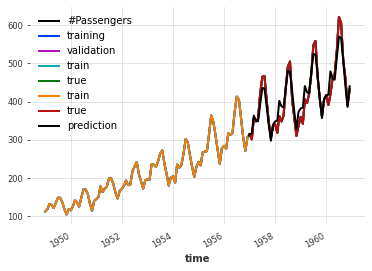

In [7]:
%matplotlib inline
## Importing Libraries
import sys
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from functools import reduce

from darts import TimeSeries
from darts.models import (
    NaiveSeasonal,
    NaiveDrift,
    Prophet,
    ExponentialSmoothing,
    ARIMA,
    AutoARIMA,
    RegressionEnsembleModel,
    RegressionModel,
    Theta,
    FFT
)

from darts.metrics import mape, mase
from darts.utils.statistics import check_seasonality, plot_acf, plot_residuals_analysis
from darts.datasets import AirPassengersDataset

import warnings
warnings.filterwarnings("ignore")
import logging
logging.disable(logging.CRITICAL)

## Load the pre-loaded Dataset
series = AirPassengersDataset().load()
series.plot()

## Split train and test data
train, val = series.split_before(pd.Timestamp('19570101'))
train.plot(label='training')
val.plot(label='validation')
plt.legend();

## Fitting multiple models and checking the MAPE
def eval_model(model):
    model.fit(train)
    forecast = model.predict(len(val))
    print('model {} obtains MAPE: {:.2f}%'.format(model, mape(val, forecast)))

eval_model(ExponentialSmoothing())
eval_model(Prophet())
eval_model(AutoARIMA())
eval_model(Theta())

## Visualizing theta foreacsting result
train.plot(label='train')
val.plot(label='true')
# forecast.plot(label='prediction')
plt.legend();

## Tuning the theta parameter to see if MAPE reduces
## Search for the best theta parameter, by trying 50 different values
thetas = 2 - np.linspace(-10, 10, 50)

best_mape = float('inf')
best_theta = 0

for theta in thetas:
    model = Theta(theta)
    model.fit(train)
    pred_theta = model.predict(len(val))
    res = mape(val, pred_theta)

    if res < best_mape:
        best_mape = res
        best_theta = theta
        
## Fitting and predicting again usinh best theta value
best_theta_model = Theta(best_theta)
best_theta_model.fit(train)
pred_best_theta = best_theta_model.predict(len(val))

print('The MAPE is: {:.2f}, with theta = {}.'.format(mape(val, pred_best_theta), best_theta))

## Visualize 
train.plot(label='train')
val.plot(label='true')
pred_best_theta.plot(label='prediction')
plt.legend();